In [1]:
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.traveltime as tt
from pygimli.physics.traveltime import load as loadGimliTT
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

In [2]:
peg_data = pg.load("GA_PEG_picks_2_official.sgt", verbose=True)
hammer_data = pg.load("hammer_picks_3.sgt", verbose=True)
sensor_data = pg.DataContainer()
for i in range(63):
    sensor_data.createSensor(peg_data.sensorPosition(i))


16/10/25 - 13:02:53 - pyGIMLi - INFO - Reading GA_PEG_picks_2_official.sgt (<function load at 0x000001B77F5E2DE0>)
16/10/25 - 13:02:53 - pyGIMLi - INFO - Reading hammer_picks_3.sgt (<function load at 0x000001B77F5E2DE0>)


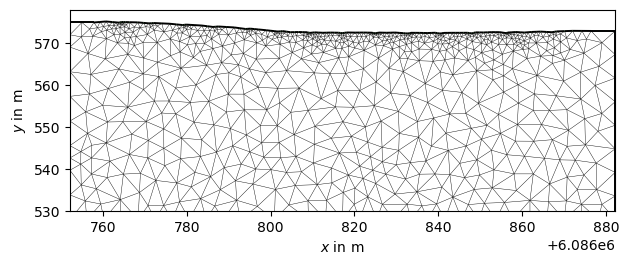

In [3]:
#sort the receiver and shot locations for a smooth mesh
sorted_positions = sorted(sensor_data.sensorPositions(), key=lambda pos: pos.x())


sorted_sensor_data = pg.DataContainer()
for pos in sorted_positions:
    sorted_sensor_data.createSensor(pos)


plc = mt.createParaMeshPLC(sorted_sensor_data, paraDepth=45, boundary=0)

plc.createEdge(plc.node(plc.nodeCount()-2), plc.node(plc.nodeCount()-1), marker=3)

mesh = mt.createMesh(plc, quality=32.5, area=15)

fig, ax = plt.subplots()
pg.show(mesh, ax = ax, markers=False)
ax.set_ylim(530, 578)
plt.show()


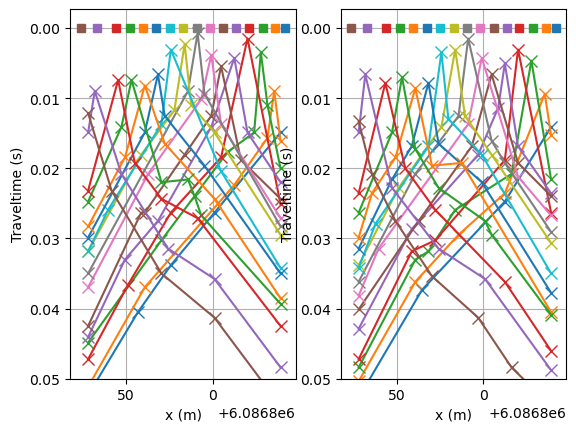

In [5]:
#Plot first break picks
fig, ax = plt.subplots(1,2)
tt.drawFirstPicks(ax[0], hammer_data)
ax[0].invert_xaxis()
ax[0].set_ylim(0.05)
tt.drawFirstPicks(ax[1], peg_data)
ax[1].set_ylim(0.05)
ax[1].invert_xaxis()


## Inversions

In [6]:
# PEG
peg_inversion = tt.TravelTimeManager(peg_data, verbose=True, debug=False)
peg_inversion.setMesh(mesh)  # to set region properties later on
peg_inversion.inv.setRegularization(background=False) # for all regions
peg_inversion.invert(secNodes=3, vTop=200, vBottom=5000, verbose=True, quality = 32.5)

16/10/25 - 13:03:03 - pyGIMLi - INFO - Found 1 regions.
16/10/25 - 13:03:04 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(C:\W10DEV\Anaconda3\envs\pg\Lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:105)
DataContainer has no "err" values. Fallback to 3%
16/10/25 - 13:03:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/10/25 - 13:03:04 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
16/10/25 - 13:03:04 - pyGIMLi - INFO - Create gradient starting model. 200: 5000
16/10/25 - 13:03:04 - pyGIMLi - INFO - Created startmodel from forward operator:1332, min/max=0.000200/0.005000
16/10/25 - 13:03:04 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001B728320FE0>
Data transformation: Identity transform
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 0.0015/0.05
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.005
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  215.77
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   36.41 (dPhi = 78.88%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   14.48 (dPhi = 47.71%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    3.73 (dPhi = 37.88%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    3.50 (dPhi = 3.89%) lam: 20.0
---------------

1332 [533.327096272157,...,4831.502893891845]

In [7]:
# hammer
hammer_inversion = tt.TravelTimeManager(hammer_data, verbose=True, debug=False)
hammer_inversion.setMesh(mesh)  # to set region properties later on
hammer_inversion.inv.setRegularization(background=False) # for all regions
hammer_inversion.invert(secNodes=3, vTop=200, vBottom=5000, verbose=True, quality = 32.5)

16/10/25 - 13:03:19 - pyGIMLi - INFO - Found 1 regions.
16/10/25 - 13:03:19 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(C:\W10DEV\Anaconda3\envs\pg\Lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:105)
DataContainer has no "err" values. Fallback to 3%
16/10/25 - 13:03:19 - pyGIMLi - INFO - Creating forward mesh from region infos.
16/10/25 - 13:03:19 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
16/10/25 - 13:03:19 - pyGIMLi - INFO - Create gradient starting model. 200: 5000
16/10/25 - 13:03:19 - pyGIMLi - INFO - Created startmodel from forward operator:1332, min/max=0.000200/0.005000
16/10/25 - 13:03:19 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001B7835F39C0>
Data transformation: Identity transform
Model transformation (cumulative):
	 0 Logarithmic LU transform, lower bound 0.0, upper bound 0.0
min/max (data): 7.1e-04/0.05
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.005
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  240.67
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   35.44 (dPhi = 80.78%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   12.15 (dPhi = 52.88%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    5.68 (dPhi = 26.41%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    4.31 (dPhi = 8.63%) lam: 20.0
--------------

1332 [823.6637476248112,...,5355.815567688149]

In [8]:
#Calculate ratio of peg/hammer
velocity_ratio = np.array(peg_inversion.model)/np.array(hammer_inversion.model)


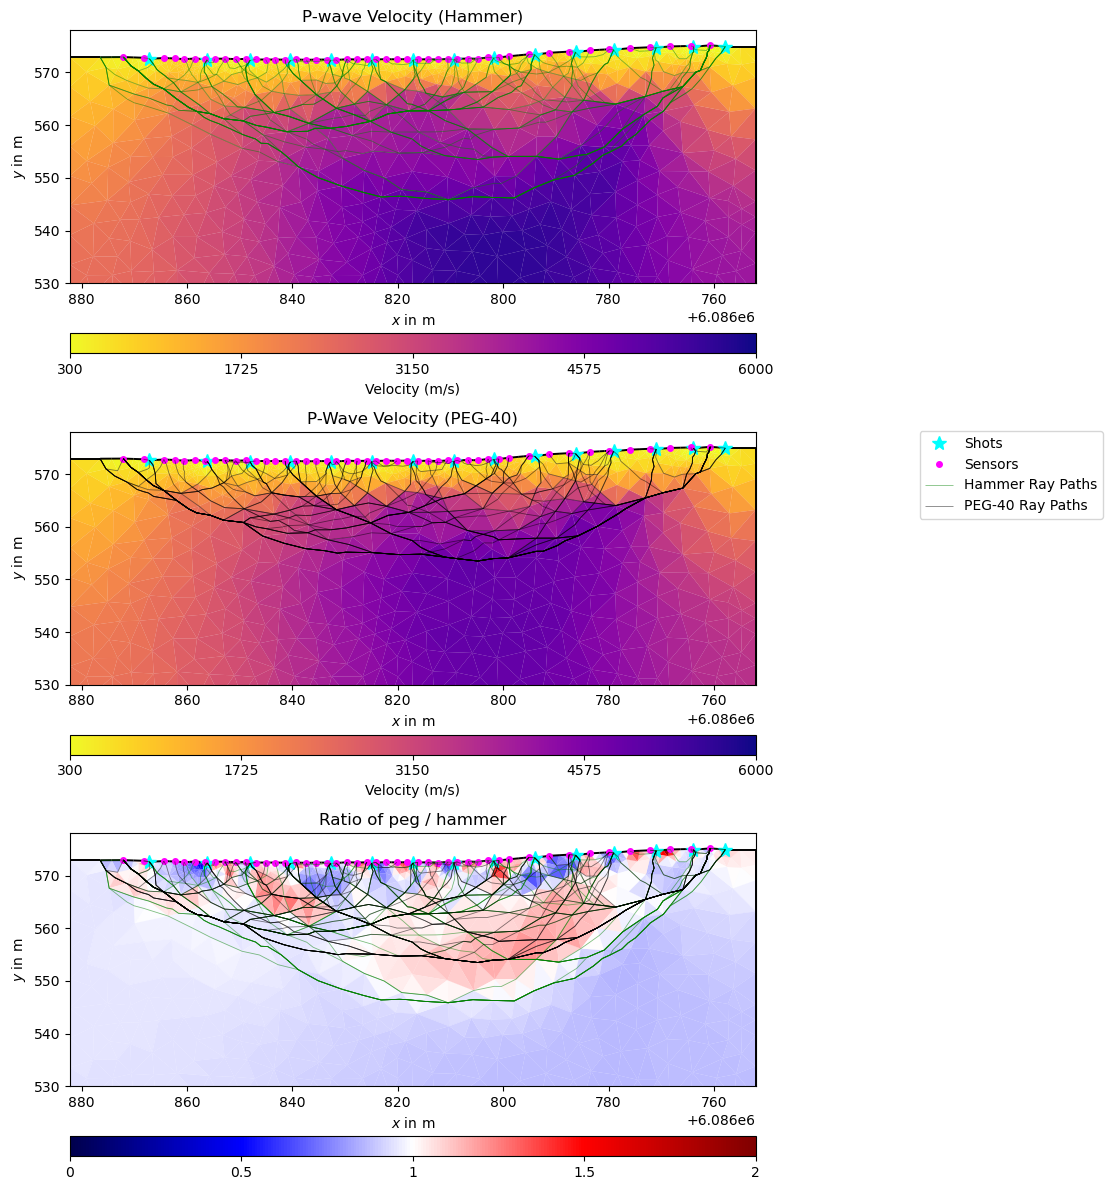

In [9]:
x_coords = pg.x(peg_data)[:47]
y_coords = pg.y(peg_data)[:47]
shot_x_coords = pg.x(peg_data)[48:]
shot_y_coords = pg.y(peg_data)[48:]

fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(3, 1, height_ratios=[1,1, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

ax3 = fig.add_subplot(gs[2, 0])

# hammer
_, _ = hammer_inversion.showResult(logScale=False, cMin=300, cMax=6000, cMap="plasma_r", ax=ax1)
ax1.invert_xaxis()
ax1.set_title("P-wave Velocity (Hammer)")
ax1.plot(shot_x_coords, shot_y_coords, 'cyan', marker="*", linestyle = "None", label='Shots', markersize=10)  # red dots
ax1.plot(x_coords, y_coords, 'magenta', marker="o", linestyle="None", label='Sensors', markersize = 4)  # red dots
ax1.set_ylim(530, 578)
rays = hammer_inversion.drawRayPaths(ax=ax1, color="green", lw=0.6, alpha=0.5)



# peg
_, _ = peg_inversion.showResult(logScale=False, cMin=300, cMax=6000, cMap="plasma_r", ax=ax2)
ax2.plot(shot_x_coords, shot_y_coords, 'cyan', marker="*", linestyle = "None", markersize=10)  # red dots
ax2.plot(x_coords, y_coords, 'magenta', marker="o", linestyle="None", markersize = 4)  # red dots
ax2.invert_xaxis()
ax2.set_title("P-Wave Velocity (PEG-40)")
ax2.set_ylim(530, 578)

rays = peg_inversion.drawRayPaths(ax2, color="black", lw=0.6, alpha=0.5)

# Plot ratio
_, _ = pg.show(mesh, velocity_ratio, ax=ax3, cMap="seismic", cMin=0, cMax=2)


ax3.plot(shot_x_coords, shot_y_coords, 'cyan', marker="*", linestyle = "None",  markersize=10)  # red dots
ax3.plot(x_coords, y_coords, 'magenta', marker="o", linestyle="None", markersize = 4)  # red dots
ax3.set_ylim(530, 578)
rays1 = hammer_inversion.drawRayPaths(ax=ax3, color="green", lw=0.6, alpha=0.5, label = "Hammer Ray Paths")
rays2 = peg_inversion.drawRayPaths(ax=ax3, color="black", lw=0.6, alpha=0.5, label = "PEG-40 Ray Paths")




ax3.invert_xaxis()
ax3.set_title("Ratio of peg / hammer")

plt.tight_layout()
fig.legend(loc=6, bbox_to_anchor = (0.75,0.35,0.5,0.5))
plt.savefig("velocity_results_figure.png")
plt.show()


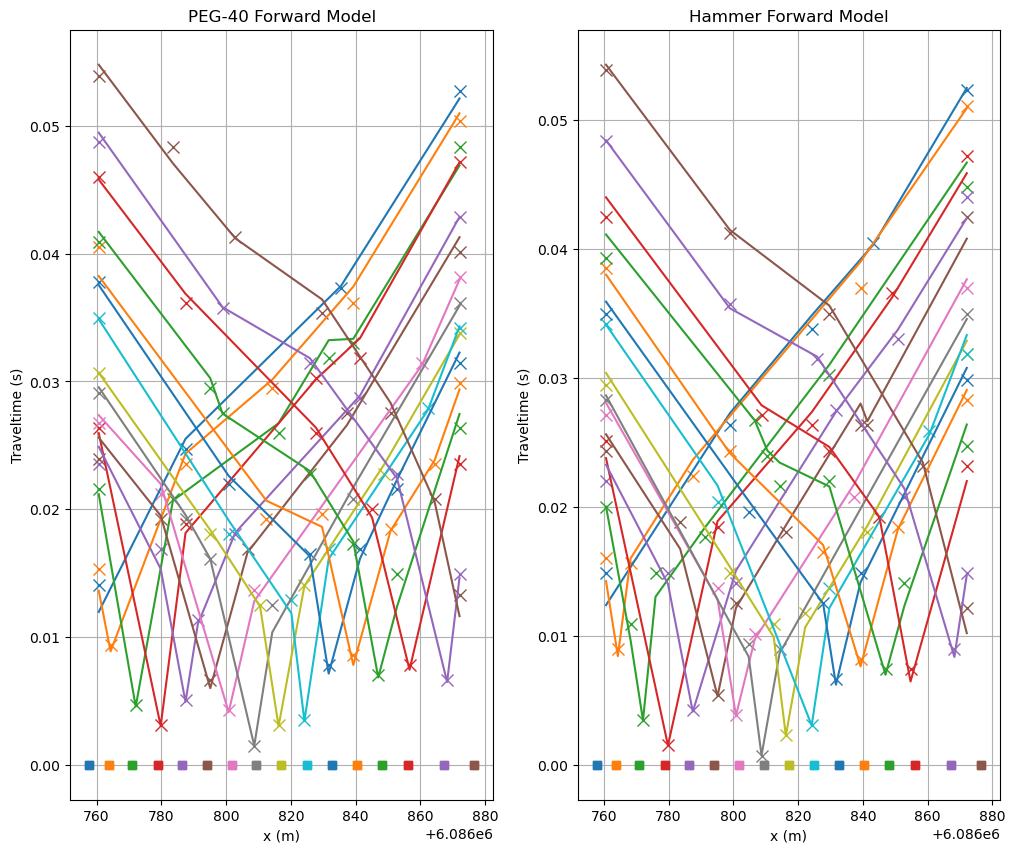

In [10]:
# plot the forward models
fig, ax = plt.subplots(1,2, figsize=(12,10))
peg_inversion.showFit(ax=ax[0],firstPicks=True)
ax[0].set_title("PEG-40 Forward Model")
hammer_inversion.showFit(ax=ax[1],firstPicks=True)
ax[1].set_title("Hammer Forward Model")
plt.savefig("P_wave_forward_model.png")
